# Fandango Capstone Project

Is there a conflict of interest for a website that hosts it's own sourced movie ticket reviews to also sell movie tickets? 

Based on an article written by 538: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)

Data from this article can be found on 538's github: https://github.com/fivethirtyeight/data. 

---
### Exploring Fandango Displayed Scores vs. Actual User Ratings

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fandango = pd.read_csv("fandango_scrape.csv")

In [5]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [6]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


##### Popularity vs. Ratings 

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

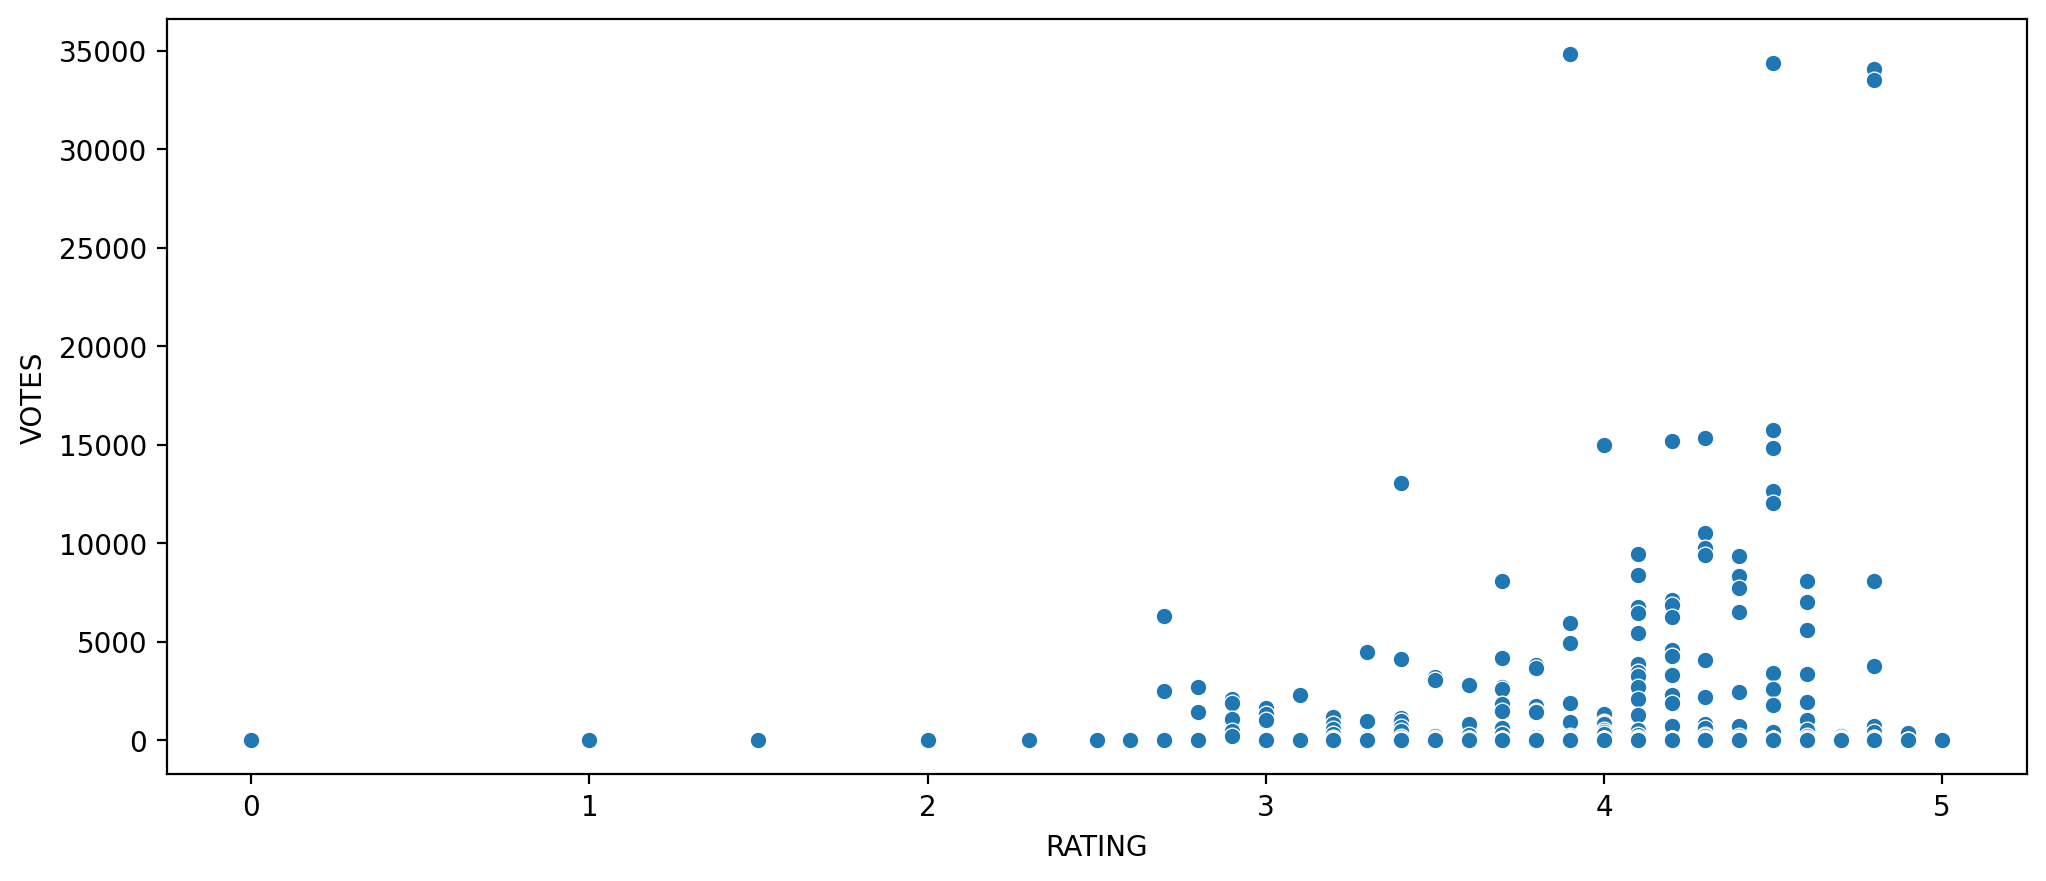

In [7]:
plt.figure(figsize=(12,5), dpi=200)
sns.scatterplot(x='RATING', y='VOTES', data=fandango)

In [8]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


##### Create a YEAR column

In [9]:
fandango['YEAR'] = fandango['FILM'].str[-6:].str.strip('()')
fandango['YEAR']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: YEAR, Length: 504, dtype: object

In [16]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


##### Explore movie years in dataset

In [11]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='Count'>

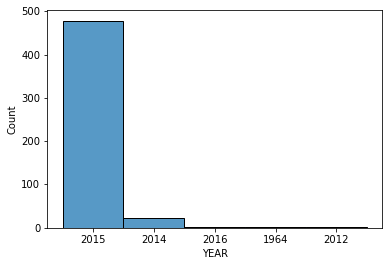

In [12]:
count=fandango['YEAR'].value_counts()
plt.figure(figsize=(6,4))
sns.histplot(data=fandango, x='YEAR', palette='tab10')

In [13]:
fandango.sort_values(by='VOTES', ascending=False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


##### Remove films with zero votes

In [14]:
fandango_vo = fandango[fandango['VOTES'] > 0]
fandango_vo

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


##### As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. 

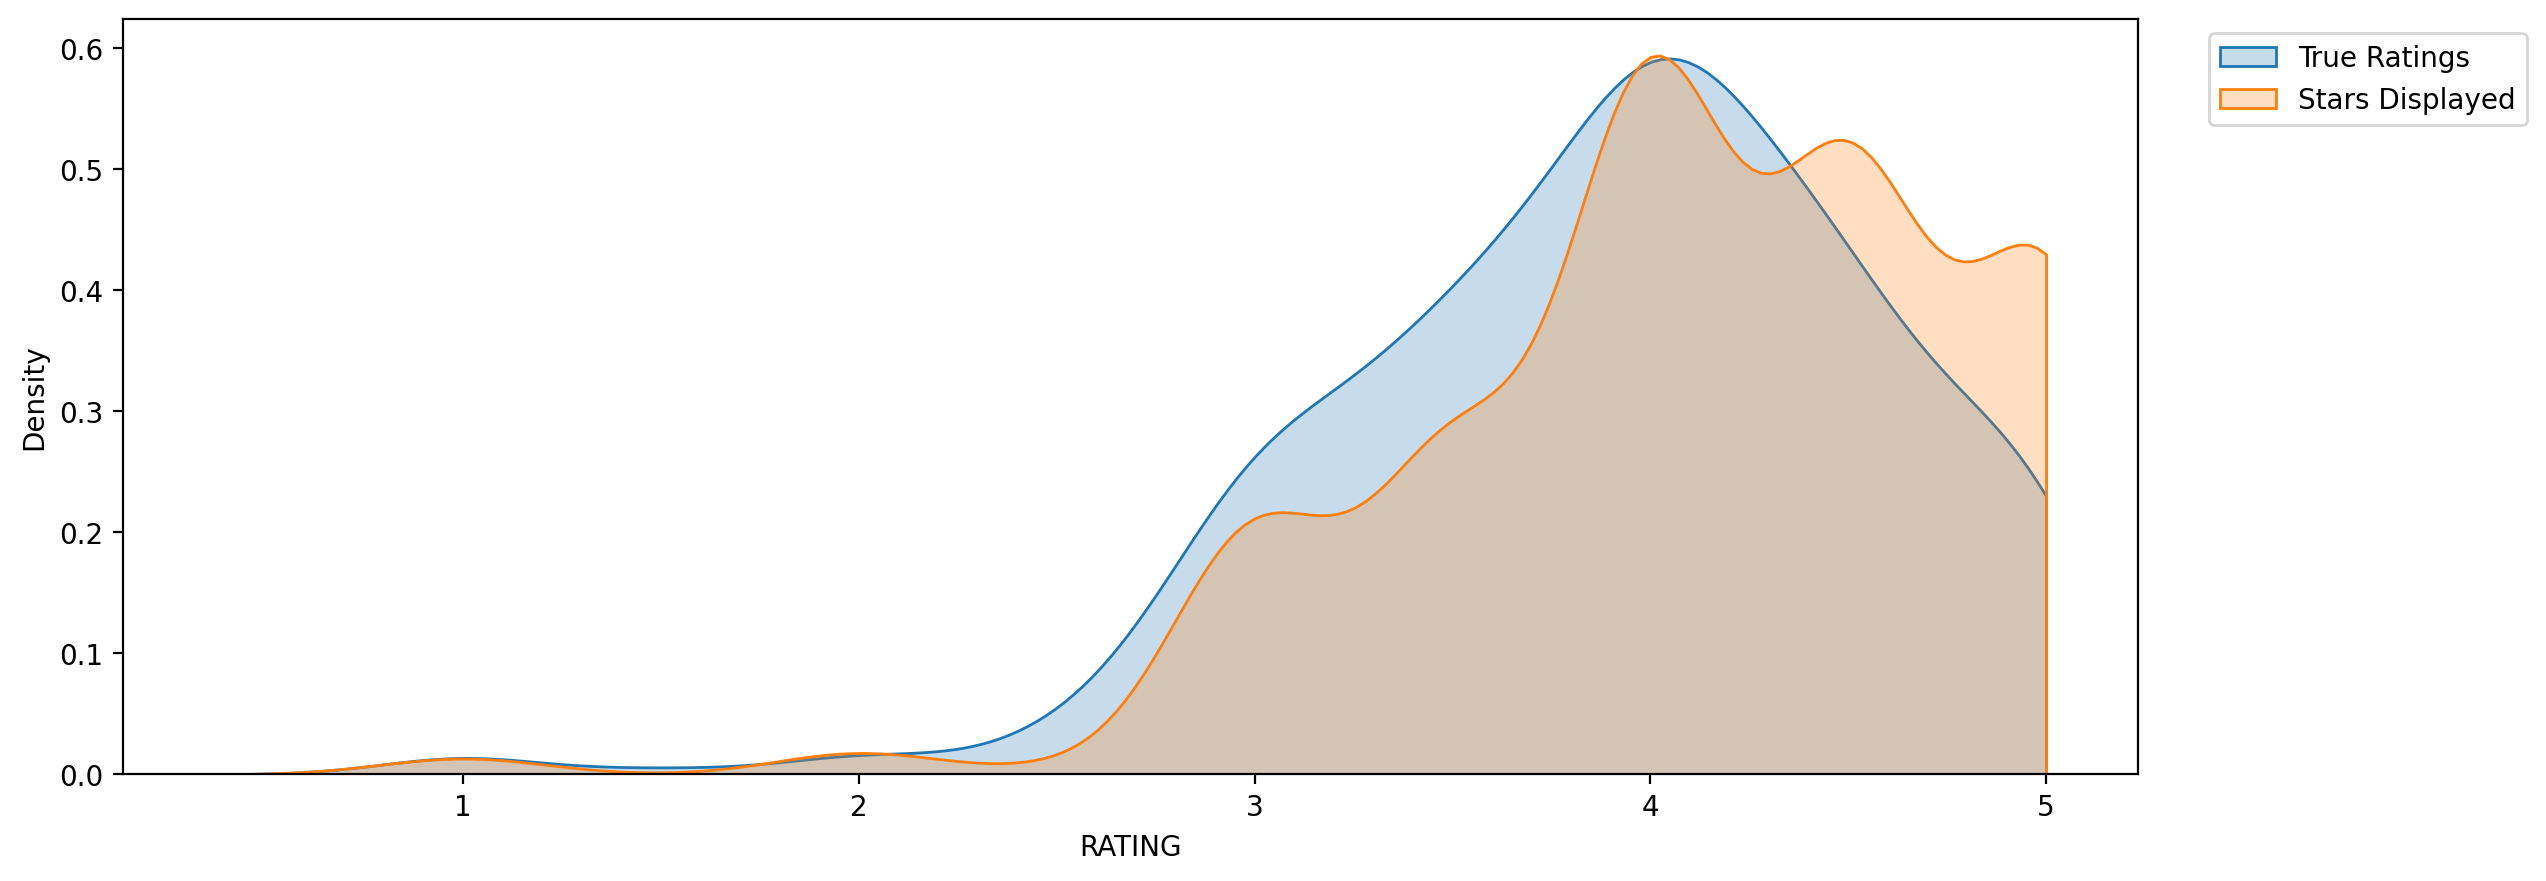

In [17]:
plt.figure(figsize=(13,5), dpi=200)
sns.kdeplot(data=fandango_vo, x='RATING', clip=[0,5], shade=True, label='True Rating')
sns.kdeplot(data=fandango_vo, x='STARS', clip=[0,5], shade=True, label='Stars Shown')
plt.legend(labels=["True Ratings","Stars Displayed"], bbox_to_anchor=(1.20, 1))

##### Create a column for the difference between STARS (stars displayed) and RATINGS (actual user ratings)

In [18]:
fandango_vo['STARS_DIFF'] = fandango_vo['STARS'] - fandango_vo['RATING']
# From Course Solution
fandango_vo['STARS_DIFF'] = fandango_vo['STARS_DIFF'].round(2) 
###
fandango_vo

/var/folders/kv/8z3g2fnx4dqcf_7ln_s_5bw40000gn/T/ipykernel_65451/1630032462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_vo['STARS_DIFF'] = fandango_vo['STARS'] - fandango_vo['RATING']
/var/folders/kv/8z3g2fnx4dqcf_7ln_s_5bw40000gn/T/ipykernel_65451/1630032462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_vo['STARS_DIFF'] = fandango_vo['STARS_DIFF'].round(2)


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


##### The number of times a difference occurs. 

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

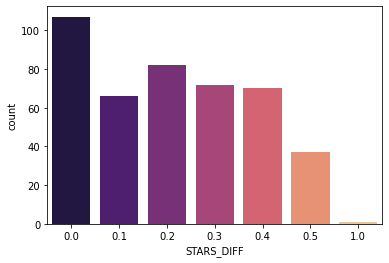

In [19]:
sns.countplot(data=fandango_vo, x='STARS_DIFF', palette='magma')

---
### Comparison of Fandango Ratings to Other Sites

In [34]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [35]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [36]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


##### Rotten Tomatoes Critic Reviews vs. User Reviews

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

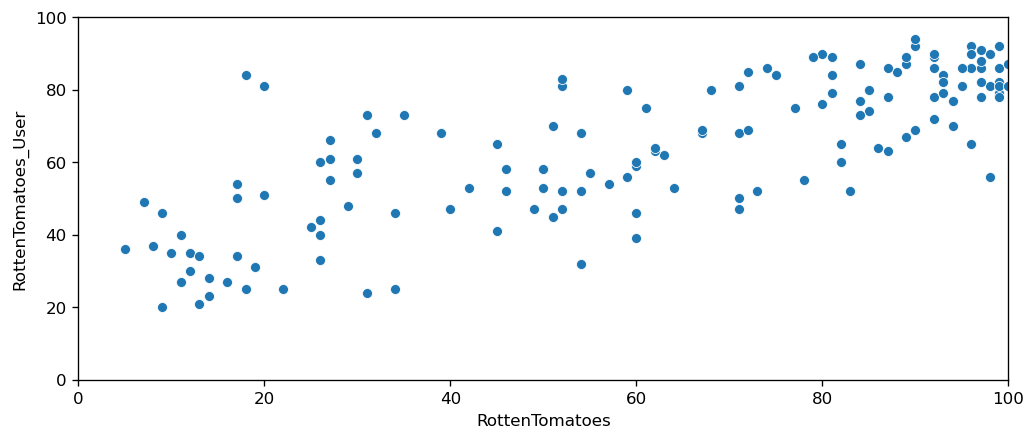

In [37]:
plt.figure(figsize=(10,4), dpi=120)
plt.xlim(0,100)
plt.ylim(0,100)
sns.scatterplot(x='RottenTomatoes', y='RottenTomatoes_User', data=all_sites)

##### New column to compare difference between critics and users

In [38]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [39]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


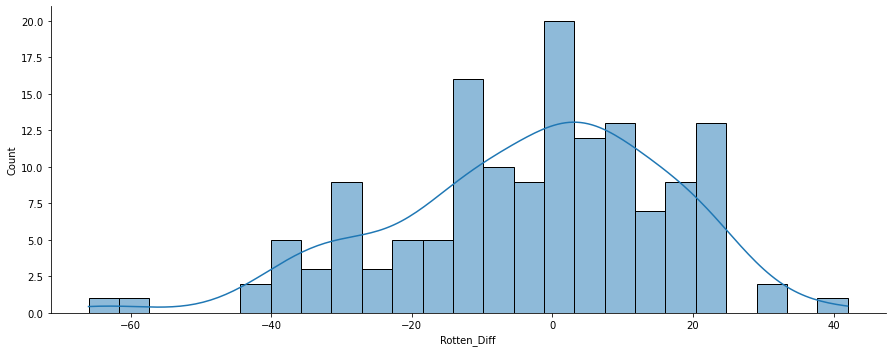

In [40]:
sns.displot(data=all_sites, x='Rotten_Diff', kde=True, bins=25, aspect=2.5)

##### Absolute value difference between RT Critics and RT Users

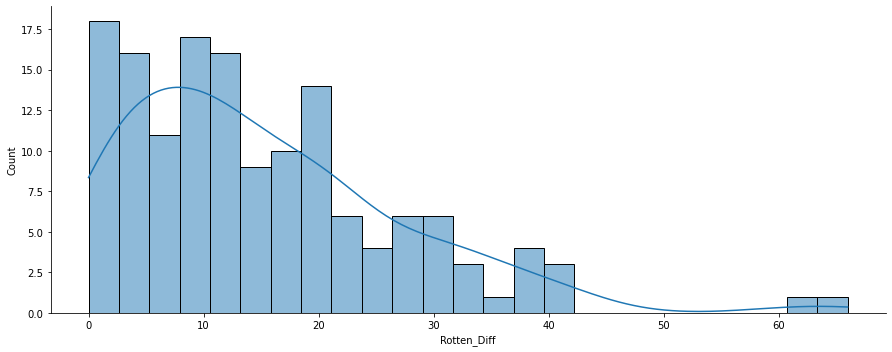

In [42]:
sns.displot(data=all_sites, x=all_sites['Rotten_Diff'].apply(abs), kde=True, bins=25, aspect=2.5)

##### Movies with largest differences

In [43]:
all_sites.sort_values('Rotten_Diff', ascending=True).head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


In [44]:
all_sites.sort_values('Rotten_Diff', ascending=False).head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
145,"Kumiko, The Treasure Hunter (2015)",87,63,68,6.4,6.7,19,5289,24
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24


---
## MetaCritic
##### Metacritic rating vs. Metacritic user rating

(0.0, 100.0)

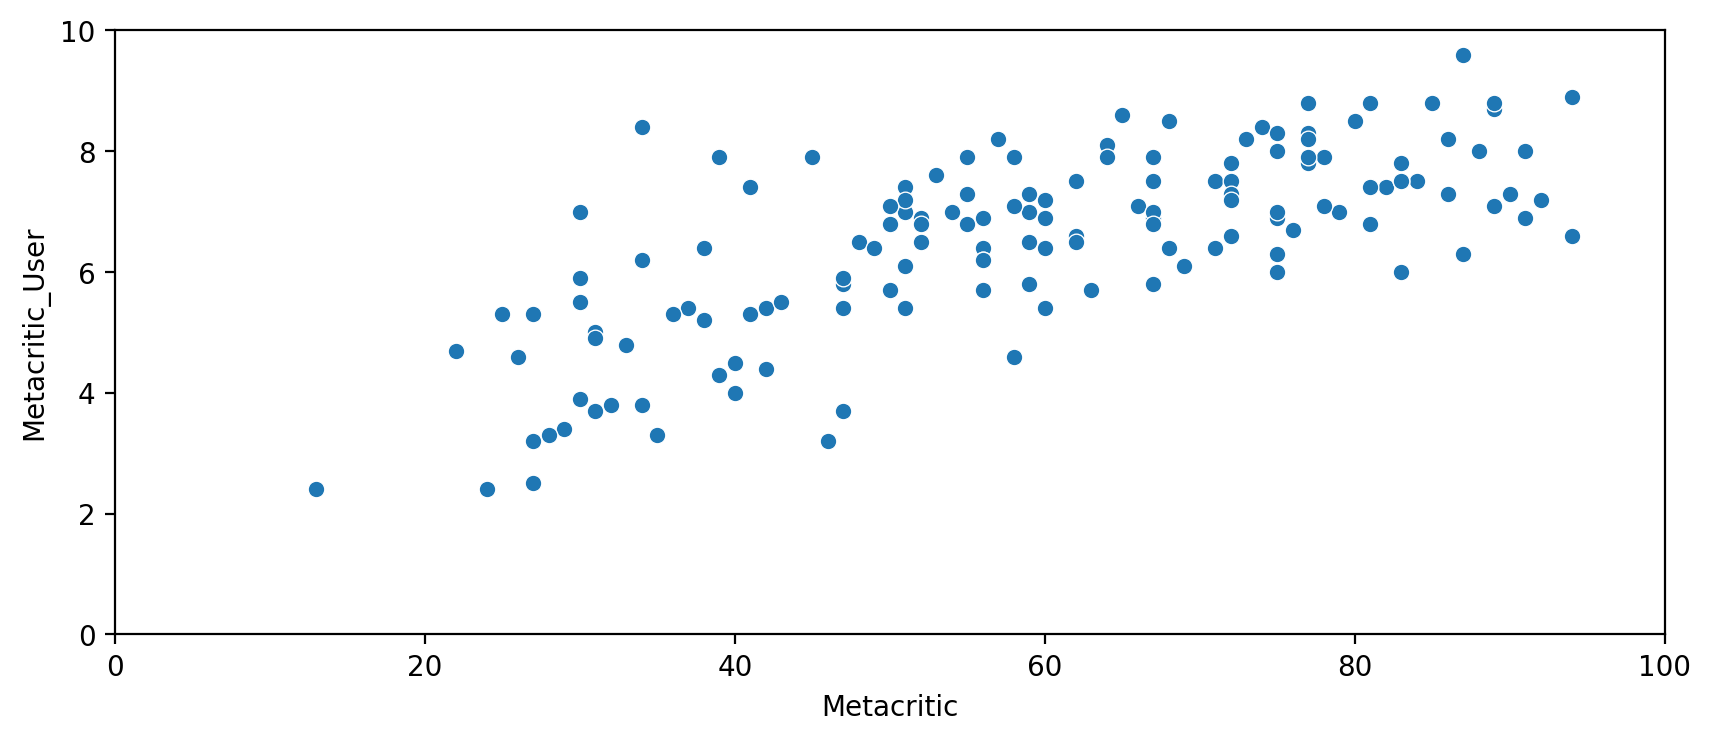

In [45]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(x='Metacritic', y='Metacritic_User', data=all_sites)
plt.ylim(0,10)
plt.xlim(0,100)

---
## IMDB
##### MetaCritic vs. IMDB vote counts

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

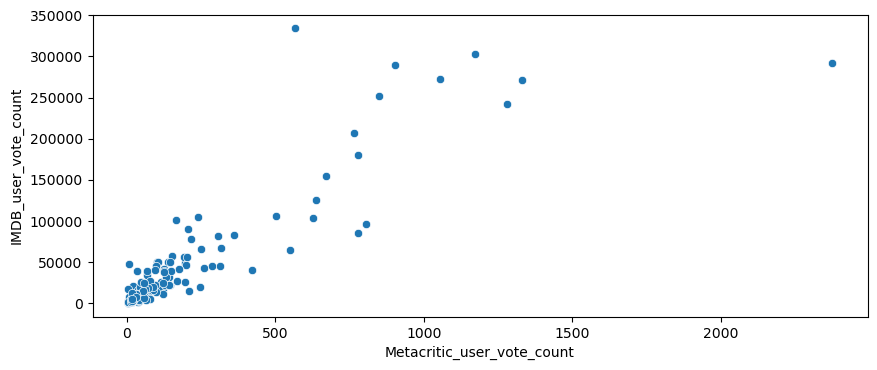

In [47]:
plt.figure(figsize=(10,4), dpi=100)
sns.scatterplot(data=all_sites, y='IMDB_user_vote_count', x='Metacritic_user_vote_count')

---
## Fandango Scores vs. All Sites

In [48]:
movie_df=fandango_vo.join(all_sites.set_index('FILM'), on='FILM').dropna()
movie_df

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25.0,42.0,46.0,3.2,4.2,778.0,179506.0,-17.0
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71.0,81.0,59.0,7.0,7.3,1281.0,241807.0,-10.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72.0,85.0,72.0,6.6,7.4,850.0,251856.0,-13.0
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81.0,84.0,67.0,6.8,7.4,764.0,207211.0,-3.0
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98.0,90.0,94.0,8.9,8.6,807.0,96252.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,0.0,87.0,63.0,68.0,6.4,6.7,19.0,5289.0,24.0
202,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,0.4,95.0,81.0,87.0,6.3,7.0,18.0,1107.0,14.0
203,The Wrecking Crew (2015),4.5,4.2,38,2015,0.3,93.0,84.0,67.0,7.0,7.8,4.0,732.0,9.0
205,Tangerine (2015),4.0,3.9,36,2015,0.1,95.0,86.0,86.0,7.3,7.4,14.0,696.0,9.0


##### Normalize STARS and RATINGS

In [49]:
movie_df['RT_NORM'] = np.round(movie_df['RottenTomatoes'] / 20, 1)
movie_df['RT_U_NORM'] = np.round(movie_df['RottenTomatoes_User'] / 20, 1)
movie_df['Meta_NORM'] = np.round(movie_df['Metacritic'] / 20, 1)
movie_df['Meta_U_NORM'] = np.round(movie_df['Metacritic_User'] / 2, 1)
movie_df['IMDB_NORM'] = np.round(movie_df['IMDB'] / 2, 1)

movie_df.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_NORM,RT_U_NORM,Meta_NORM,Meta_U_NORM,IMDB_NORM
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25.0,42.0,46.0,3.2,4.2,778.0,179506.0,-17.0,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71.0,81.0,59.0,7.0,7.3,1281.0,241807.0,-10.0,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72.0,85.0,72.0,6.6,7.4,850.0,251856.0,-13.0,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81.0,84.0,67.0,6.8,7.4,764.0,207211.0,-3.0,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98.0,90.0,94.0,8.9,8.6,807.0,96252.0,8.0,4.9,4.5,4.7,4.4,4.3


##### Dataframe with only normalized Score and Ratings 

In [50]:
score_df = movie_df[['FILM','STARS','RATING','RT_NORM','RT_U_NORM', 'Meta_NORM','Meta_U_NORM','IMDB_NORM']].copy()
score_df.head()

,FILM,STARS,RATING,RT_NORM,RT_U_NORM,Meta_NORM,Meta_U_NORM,IMDB_NORM
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Distribution of Scores Between All Sites

<AxesSubplot:ylabel='Density'>

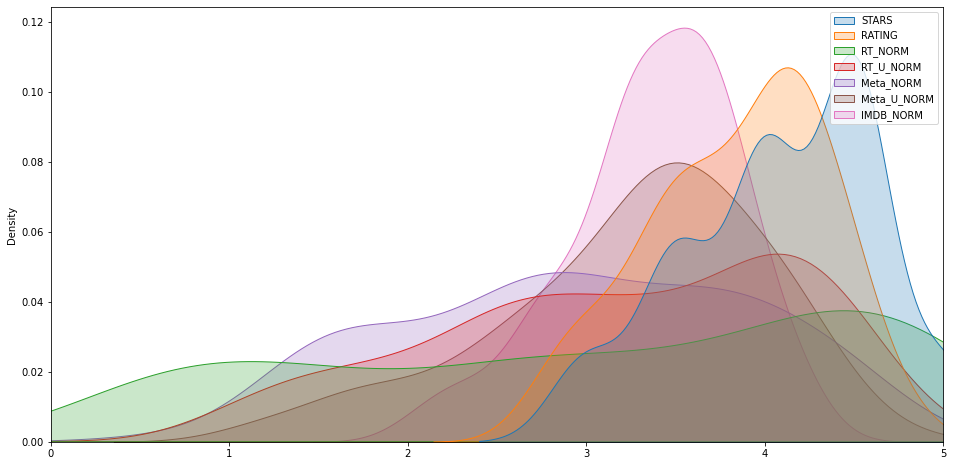

In [51]:
plt.figure(figsize=(16,8))
plt.xlim(0,5)
sns.kdeplot(data=score_df, fill=True, alpha=.25)

##### RT Critics Ratings vs. Fandango Stars

<AxesSubplot:ylabel='Density'>

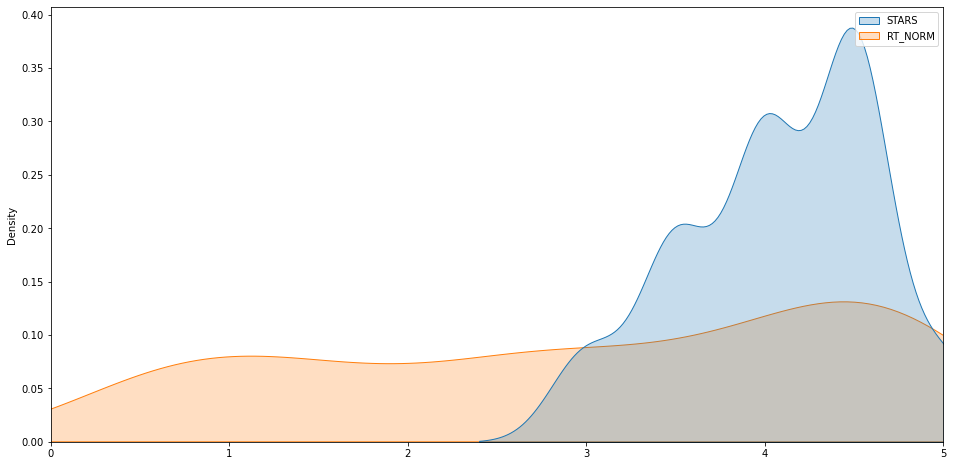

In [52]:
fnr_df = movie_df[['FILM','STARS','RT_NORM']].copy()
fnr_df.head()
plt.figure(figsize=(16,8))
plt.xlim(0,5)
sns.kdeplot(data=fnr_df, fill=True, alpha=.25)

---
## Clearly Fandango is rating movies much higher than other sites. 
Based on Rotten Tomatoes Critic Ratings, what are the worst offenders of Fandango's review fudging? 

In [53]:
worst_movies_df = score_df.sort_values(by=['RT_NORM']).head(10)
worst_movies_df

,FILM,STARS,RATING,RT_NORM,RT_U_NORM,Meta_NORM,Meta_U_NORM,IMDB_NORM
51,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
26,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
29,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
88,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
56,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
52,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
124,The Vatican Tapes (2015),3.0,2.9,0.6,1.0,1.8,2.7,2.3
92,The Loft (2015),4.0,3.6,0.6,2.0,1.2,1.2,3.2
91,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7
87,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8


<AxesSubplot:ylabel='Density'>

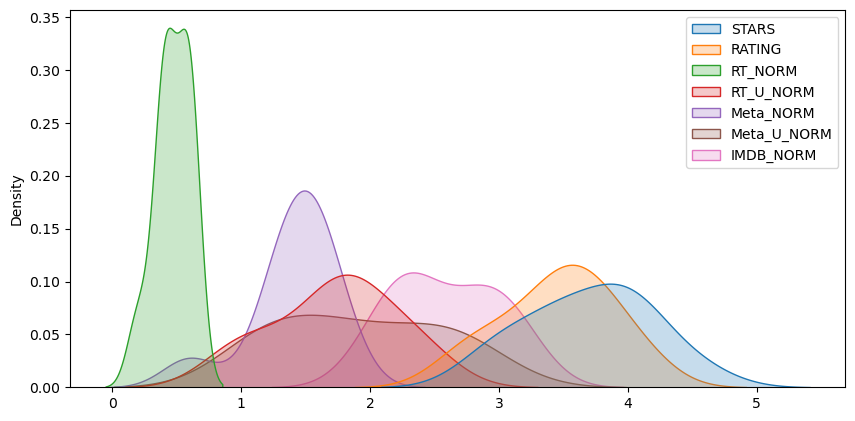

In [54]:
plt.figure(figsize=(10,5), dpi=100)
sns.kdeplot(data=worst_movies_df, alpha=.25, fill=True)

Taken 3 has by far the largest rating discrepency.

In [62]:
worst_movies_df.iloc[1]

FILM           Taken 3 (2015)
STARS                     4.5
RATING                    4.1
RT_NORM                   0.4
RT_U_NORM                 2.3
Meta_NORM                 1.3
Meta_U_NORM               2.3
IMDB_NORM                 3.0
Name: 26, dtype: object